# Pandas working with GFF3 file

## Introduction

GFF3 (General Feature Format version 3) is a standard file format for describing genes, transcripts, and other features in a genome. Pandas is a powerful data manipulation library in Python. In this tutorial, we'll explore how to use pandas to read and manipulate data from a GFF3 file.

###  Installation
You will need `pandas` so if you have not installed it, go ahead and install using `conda` or `pip`. Typically using either `pip install pandas` or `conda install pandas` .

### Import Libraries

Let's import the necessary libraries:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read GFF3 file
We will use maize annotation file for B73 downloaded from MaizeGDB for this tutorial. The file is loacted [here](https://download.maizegdb.org/Zm-B73-REFERENCE-NAM-5.0/) but it has been pre-downloaded to the working directory. 

Then file name is `Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz` 

In [5]:
## in bash (note the exclamation point in front of standard commands)
!wget https://download.maizegdb.org/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz
!gunzip Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz

--2024-03-13 20:58:55--  https://download.maizegdb.org/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz
Resolving download.maizegdb.org (download.maizegdb.org)... 104.26.11.112, 172.67.74.80, 104.26.10.112, ...
Connecting to download.maizegdb.org (download.maizegdb.org)|104.26.11.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12251264 (12M) [application/x-gzip]
Saving to: ‘Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz’

Zm-B73-REFERENCE-NA 100%[===================>]  11.68M  65.3MB/s    in 0.2s    

2024-03-13 20:58:55 (65.3 MB/s) - ‘Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3.gz’ saved [12251264/12251264]



In [6]:
file_path = 'Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3'

In [7]:
# Read the GFF3 file into a pandas DataFrame
columns = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
df = pd.read_csv(file_path, sep='\t', comment='#', header=None, names=columns)

### Explore data
Let's take a look at the first few rows of the DataFrame:

In [8]:
df.head(10)  # if you don't put number in there it will only print first file rows.

,seqid,source,type,start,end,score,strand,phase,attributes
0,chr1,assembly,chromosome,1,308452471,.,.,.,ID=1;Name=chromosome:Zm-B73-REFERENCE-NAM-5.0:...
1,chr1,NAM,gene,34617,40204,.,+,.,ID=Zm00001eb000010;biotype=protein_coding;logi...
2,chr1,NAM,mRNA,34617,40204,.,+,.,ID=Zm00001eb000010_T001;Parent=Zm00001eb000010...
3,chr1,NAM,five_prime_UTR,34617,34721,.,+,.,Parent=Zm00001eb000010_T001
4,chr1,NAM,exon,34617,35318,.,+,.,Parent=Zm00001eb000010_T001;Name=Zm00001eb0000...
5,chr1,NAM,exon,36037,36174,.,+,.,Parent=Zm00001eb000010_T001;Name=Zm00001eb0000...
6,chr1,NAM,exon,36259,36504,.,+,.,Parent=Zm00001eb000010_T001;Name=Zm00001eb0000...
7,chr1,NAM,exon,36600,36713,.,+,.,Parent=Zm00001eb000010_T001;Name=Zm00001eb0000...
8,chr1,NAM,exon,36822,37004,.,+,.,Parent=Zm00001eb000010_T001;Name=Zm00001eb0000...
9,chr1,NAM,exon,37416,37633,.,+,.,Parent=Zm00001eb000010_T001;Name=Zm00001eb0000...


In [9]:
df.tail()

,seqid,source,type,start,end,score,strand,phase,attributes
1143798,scaf_695,NAM,mRNA,2336,4226,.,-,.,ID=Zm00001eb443030_T001;Parent=Zm00001eb443030...
1143799,scaf_695,NAM,five_prime_UTR,4218,4226,.,-,.,Parent=Zm00001eb443030_T001
1143800,scaf_695,NAM,exon,2336,4226,.,-,.,Parent=Zm00001eb443030_T001;Name=Zm00001eb4430...
1143801,scaf_695,NAM,CDS,2898,4217,.,-,0,ID=Zm00001eb443030_P001;Parent=Zm00001eb443030...
1143802,scaf_695,NAM,three_prime_UTR,2336,2897,.,-,.,Parent=Zm00001eb443030_T001


To understnad how big this file is, we can get the count of coloumns and rows.

To examine the columns and the type of object they are assigned to, we can use the `info` method

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143803 entries, 0 to 1143802
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   seqid       1143803 non-null  object
 1   source      1143803 non-null  object
 2   type        1143803 non-null  object
 3   start       1143803 non-null  int64 
 4   end         1143803 non-null  int64 
 5   score       1143803 non-null  object
 6   strand      1143803 non-null  object
 7   phase       1143803 non-null  object
 8   attributes  1143803 non-null  object
dtypes: int64(2), object(7)
memory usage: 78.5+ MB


In [11]:
df.shape # note that there is no parenthesis here

(1143803, 9)

It looks like the GFF3 file has annotations for chromsomes and scaffolds. To understand what's all included, let's examine the unique entries in this column.

It looks like the GFF3 file has annotations for chromsomes and scaffolds. To understand what's all included, let's examine the unique entries in this column.

In [12]:
df.seqid.unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chr10', 'scaf_22', 'scaf_23', 'scaf_30', 'scaf_32',
       'scaf_33', 'scaf_34', 'scaf_36', 'scaf_37', 'scaf_45', 'scaf_48',
       'scaf_49', 'scaf_54', 'scaf_56', 'scaf_61', 'scaf_66', 'scaf_67',
       'scaf_72', 'scaf_77', 'scaf_82', 'scaf_87', 'scaf_88', 'scaf_94',
       'scaf_100', 'scaf_103', 'scaf_106', 'scaf_107', 'scaf_110',
       'scaf_113', 'scaf_114', 'scaf_126', 'scaf_136', 'scaf_138',
       'scaf_139', 'scaf_143', 'scaf_146', 'scaf_153', 'scaf_155',
       'scaf_158', 'scaf_160', 'scaf_161', 'scaf_173', 'scaf_174',
       'scaf_178', 'scaf_179', 'scaf_181', 'scaf_183', 'scaf_186',
       'scaf_187', 'scaf_190', 'scaf_191', 'scaf_194', 'scaf_196',
       'scaf_198', 'scaf_200', 'scaf_203', 'scaf_209', 'scaf_210',
       'scaf_212', 'scaf_214', 'scaf_219', 'scaf_221', 'scaf_222',
       'scaf_223', 'scaf_224', 'scaf_228', 'scaf_229', 'scaf_231',
       'scaf_232', 'scaf_235', 'scaf_23

similarly, let's examine the features that are included in this GFF3 file

In [13]:
df.type.unique()

array(['chromosome', 'gene', 'mRNA', 'five_prime_UTR', 'exon', 'CDS',
       'three_prime_UTR', 'scaffold'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143803 entries, 0 to 1143802
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   seqid       1143803 non-null  object
 1   source      1143803 non-null  object
 2   type        1143803 non-null  object
 3   start       1143803 non-null  int64 
 4   end         1143803 non-null  int64 
 5   score       1143803 non-null  object
 6   strand      1143803 non-null  object
 7   phase       1143803 non-null  object
 8   attributes  1143803 non-null  object
dtypes: int64(2), object(7)
memory usage: 78.5+ MB


### Filtering data

Next, we will filter this dataframe to include/exclude certain coloumns/rows as per our liking.

To filter specific chromsome features, you can design a filter and use it for filtering the dataframe

In [15]:
chr1_filter = (df['seqid'] == 'chr1')
df[chr1_filter]

,seqid,source,type,start,end,score,strand,phase,attributes
0,chr1,assembly,chromosome,1,308452471,.,.,.,ID=1;Name=chromosome:Zm-B73-REFERENCE-NAM-5.0:...
1,chr1,NAM,gene,34617,40204,.,+,.,ID=Zm00001eb000010;biotype=protein_coding;logi...
2,chr1,NAM,mRNA,34617,40204,.,+,.,ID=Zm00001eb000010_T001;Parent=Zm00001eb000010...
3,chr1,NAM,five_prime_UTR,34617,34721,.,+,.,Parent=Zm00001eb000010_T001
4,chr1,NAM,exon,34617,35318,.,+,.,Parent=Zm00001eb000010_T001;Name=Zm00001eb0000...
...,...,...,...,...,...,...,...,...,...
173969,chr1,NAM,CDS,308323081,308323272,.,-,1,ID=Zm00001eb065550_P004;Parent=Zm00001eb065550...
173970,chr1,NAM,CDS,308323740,308323868,.,-,1,ID=Zm00001eb065550_P004;Parent=Zm00001eb065550...
173971,chr1,NAM,CDS,308332001,308332554,.,-,0,ID=Zm00001eb065550_P004;Parent=Zm00001eb065550...
173972,chr1,NAM,three_prime_UTR,308312729,308312859,.,-,.,Parent=Zm00001eb065550_T004


You can filter using multiple columns as well. Let's select `chr1` and just `gene` features
(below example shows `and` operator (`&`), but for `or` you can use `|`)

In [16]:
chr1_filter = (df['seqid'] == 'chr1') & (df['type'] == 'gene')
df[chr1_filter]

,seqid,source,type,start,end,score,strand,phase,attributes
1,chr1,NAM,gene,34617,40204,.,+,.,ID=Zm00001eb000010;biotype=protein_coding;logi...
23,chr1,NAM,gene,41214,46762,.,-,.,ID=Zm00001eb000020;biotype=protein_coding;logi...
106,chr1,NAM,gene,108554,114382,.,-,.,ID=Zm00001eb000050;biotype=protein_coding;logi...
123,chr1,NAM,gene,188559,189581,.,-,.,ID=Zm00001eb000060;biotype=protein_coding;logi...
131,chr1,NAM,gene,190192,198832,.,-,.,ID=Zm00001eb000070;biotype=protein_coding;logi...
...,...,...,...,...,...,...,...,...,...
173687,chr1,NAM,gene,308026534,308031577,.,+,.,ID=Zm00001eb065510;biotype=protein_coding;logi...
173759,chr1,NAM,gene,308170638,308193611,.,-,.,ID=Zm00001eb065520;biotype=protein_coding;logi...
173853,chr1,NAM,gene,308196415,308197186,.,-,.,ID=Zm00001eb065530;biotype=protein_coding;logi...
173863,chr1,NAM,gene,308297402,308300265,.,+,.,ID=Zm00001eb065540;biotype=protein_coding;logi...


You will need to use `.loc` method and select the columns you need as follows:

In [17]:
df.loc[chr1_filter, ('seqid', 'start', 'end')]

,seqid,start,end
1,chr1,34617,40204
23,chr1,41214,46762
106,chr1,108554,114382
123,chr1,188559,189581
131,chr1,190192,198832
...,...,...,...
173687,chr1,308026534,308031577
173759,chr1,308170638,308193611
173853,chr1,308196415,308197186
173863,chr1,308297402,308300265


More elaborate way to select only chromosome features is creating a list of `seqid`'s and using it to filter

In [18]:
chrs = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10']
filt = df['seqid'].isin(chrs)
df.loc[filt]

,seqid,source,type,start,end,score,strand,phase,attributes
0,chr1,assembly,chromosome,1,308452471,.,.,.,ID=1;Name=chromosome:Zm-B73-REFERENCE-NAM-5.0:...
1,chr1,NAM,gene,34617,40204,.,+,.,ID=Zm00001eb000010;biotype=protein_coding;logi...
2,chr1,NAM,mRNA,34617,40204,.,+,.,ID=Zm00001eb000010_T001;Parent=Zm00001eb000010...
3,chr1,NAM,five_prime_UTR,34617,34721,.,+,.,Parent=Zm00001eb000010_T001
4,chr1,NAM,exon,34617,35318,.,+,.,Parent=Zm00001eb000010_T001;Name=Zm00001eb0000...
...,...,...,...,...,...,...,...,...,...
1138113,chr10,NAM,exon,152286718,152287382,.,-,.,Parent=Zm00001eb434590_T001;Name=Zm00001eb4345...
1138114,chr10,NAM,CDS,152285016,152286200,.,-,0,ID=Zm00001eb434590_P001;Parent=Zm00001eb434590...
1138115,chr10,NAM,CDS,152286281,152286588,.,-,2,ID=Zm00001eb434590_P001;Parent=Zm00001eb434590...
1138116,chr10,NAM,CDS,152286718,152287096,.,-,0,ID=Zm00001eb434590_P001;Parent=Zm00001eb434590...


To get the opposite (only scaffold features), you can use the negate oerpator (`~`)

In [19]:
df.loc[~filt]

,seqid,source,type,start,end,score,strand,phase,attributes
1138118,scaf_22,assembly,scaffold,1,570058,.,.,.,ID=scaf_22;Name=scaffold:Zm-B73-REFERENCE-NAM-...
1138119,scaf_22,NAM,gene,314824,317618,.,-,.,ID=Zm00001eb434600;biotype=protein_coding;logi...
1138120,scaf_22,NAM,mRNA,314973,317300,.,-,.,ID=Zm00001eb434600_T005;Parent=Zm00001eb434600...
1138121,scaf_22,NAM,five_prime_UTR,316979,317058,.,-,.,Parent=Zm00001eb434600_T005
1138122,scaf_22,NAM,five_prime_UTR,317224,317300,.,-,.,Parent=Zm00001eb434600_T005
...,...,...,...,...,...,...,...,...,...
1143798,scaf_695,NAM,mRNA,2336,4226,.,-,.,ID=Zm00001eb443030_T001;Parent=Zm00001eb443030...
1143799,scaf_695,NAM,five_prime_UTR,4218,4226,.,-,.,Parent=Zm00001eb443030_T001
1143800,scaf_695,NAM,exon,2336,4226,.,-,.,Parent=Zm00001eb443030_T001;Name=Zm00001eb4430...
1143801,scaf_695,NAM,CDS,2898,4217,.,-,0,ID=Zm00001eb443030_P001;Parent=Zm00001eb443030...


To make it more easier (than typing all chromosomes), you can use string method.

In [20]:
filt = df['seqid'].str.contains('chr') 
df.loc[filt]

,seqid,source,type,start,end,score,strand,phase,attributes
0,chr1,assembly,chromosome,1,308452471,.,.,.,ID=1;Name=chromosome:Zm-B73-REFERENCE-NAM-5.0:...
1,chr1,NAM,gene,34617,40204,.,+,.,ID=Zm00001eb000010;biotype=protein_coding;logi...
2,chr1,NAM,mRNA,34617,40204,.,+,.,ID=Zm00001eb000010_T001;Parent=Zm00001eb000010...
3,chr1,NAM,five_prime_UTR,34617,34721,.,+,.,Parent=Zm00001eb000010_T001
4,chr1,NAM,exon,34617,35318,.,+,.,Parent=Zm00001eb000010_T001;Name=Zm00001eb0000...
...,...,...,...,...,...,...,...,...,...
1138113,chr10,NAM,exon,152286718,152287382,.,-,.,Parent=Zm00001eb434590_T001;Name=Zm00001eb4345...
1138114,chr10,NAM,CDS,152285016,152286200,.,-,0,ID=Zm00001eb434590_P001;Parent=Zm00001eb434590...
1138115,chr10,NAM,CDS,152286281,152286588,.,-,2,ID=Zm00001eb434590_P001;Parent=Zm00001eb434590...
1138116,chr10,NAM,CDS,152286718,152287096,.,-,0,ID=Zm00001eb434590_P001;Parent=Zm00001eb434590...


using what we learnt so far, we will select chromosome genes only and create a new df that we call `genes_df`

In [21]:
filt = (df['type'] == 'gene') & (df['seqid'].str.contains('chr')) 
genes_df = df.loc[filt, ('seqid', 'start', 'end', 'strand')]
genes_df

,seqid,start,end,strand
1,chr1,34617,40204,+
23,chr1,41214,46762,-
106,chr1,108554,114382,-
123,chr1,188559,189581,-
131,chr1,190192,198832,-
...,...,...,...,...
1138072,chr10,152010430,152012584,-
1138078,chr10,152012893,152015823,-
1138094,chr10,152200925,152201511,+
1138100,chr10,152280251,152282615,+


To calculate the length of genes, you can subtract start from end and add 1 (0 index file)

In [22]:
genes_df['gene_length'] = genes_df['end'] - genes_df['start'] + 1

In [23]:
genes_df

,seqid,start,end,strand,gene_length
1,chr1,34617,40204,+,5588
23,chr1,41214,46762,-,5549
106,chr1,108554,114382,-,5829
123,chr1,188559,189581,-,1023
131,chr1,190192,198832,-,8641
...,...,...,...,...,...
1138072,chr10,152010430,152012584,-,2155
1138078,chr10,152012893,152015823,-,2931
1138094,chr10,152200925,152201511,+,587
1138100,chr10,152280251,152282615,+,2365


In [24]:
genes_df.describe()

,start,end,gene_length
count,3.903500e+04,3.903500e+04,39035.000000
mean,1.217622e+08,1.217667e+08,4511.685692
std,7.882450e+07,7.882447e+07,8883.021565
min,2.992300e+04,3.141900e+04,213.000000
25%,4.600279e+07,4.600735e+07,1240.000000
50%,1.297063e+08,1.297070e+08,2716.000000
75%,1.797582e+08,1.797591e+08,5060.000000
max,3.083127e+08,3.083327e+08,751401.000000


In [25]:
genes_df['gene_length'].describe()

count     39035.000000
mean       4511.685692
std        8883.021565
min         213.000000
25%        1240.000000
50%        2716.000000
75%        5060.000000
max      751401.000000
Name: gene_length, dtype: float64

In [26]:
genes_df['seqid'].count()

39035

In [27]:
genes_df['seqid'].value_counts()

seqid
chr1     5892
chr2     4751
chr5     4485
chr3     4103
chr4     4093
chr8     3536
chr6     3412
chr7     3070
chr9     2988
chr10    2705
Name: count, dtype: int64

In [28]:
df.groupby('type').size()

type
CDS                403367
chromosome             10
exon               452083
five_prime_UTR      93789
gene                39756
mRNA                72539
scaffold              180
three_prime_UTR     82079
dtype: int64

<Axes: xlabel='seqid', ylabel='count'>

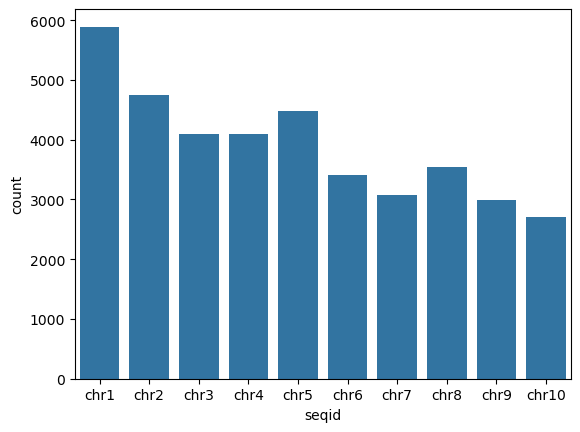

In [29]:
sns.countplot(x="seqid", data=genes_df)


In [30]:
filt = (df['type'] == 'CDS') & (df['seqid'].str.contains('chr'))
cds_df = df.loc[filt, ('seqid', 'start', 'end', 'strand')]
cds_df['cds_length'] = cds_df['end'] - cds_df['start'] + 1

In [31]:
cds_df

,seqid,start,end,strand,cds_length
13,chr1,34722,35318,+,597
14,chr1,36037,36174,+,138
15,chr1,36259,36504,+,246
16,chr1,36600,36713,+,114
17,chr1,36822,37004,+,183
...,...,...,...,...,...
1138098,chr10,152201032,152201370,+,339
1138106,chr10,152280828,152282141,+,1314
1138114,chr10,152285016,152286200,-,1185
1138115,chr10,152286281,152286588,-,308


In [32]:
cds_df['seqid'].count()

401806

In [33]:
cds_df['seqid'].value_counts()

seqid
chr1     61506
chr5     46947
chr2     46462
chr3     45211
chr4     41913
chr8     36821
chr6     34343
chr9     31101
chr7     30642
chr10    26860
Name: count, dtype: int64

<Axes: xlabel='seqid', ylabel='count'>

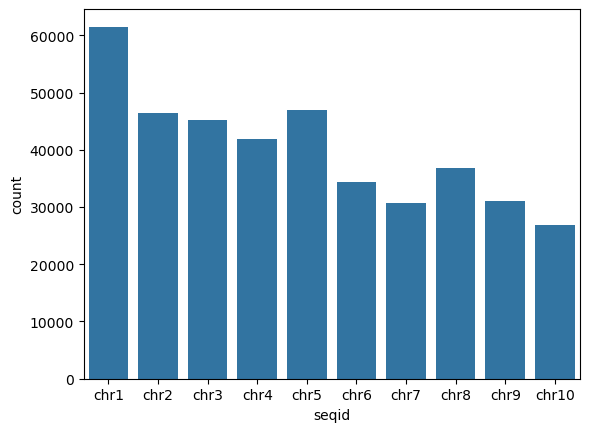

In [34]:
sns.countplot(x="seqid", data=cds_df)

<Axes: xlabel='cds_length', ylabel='Count'>

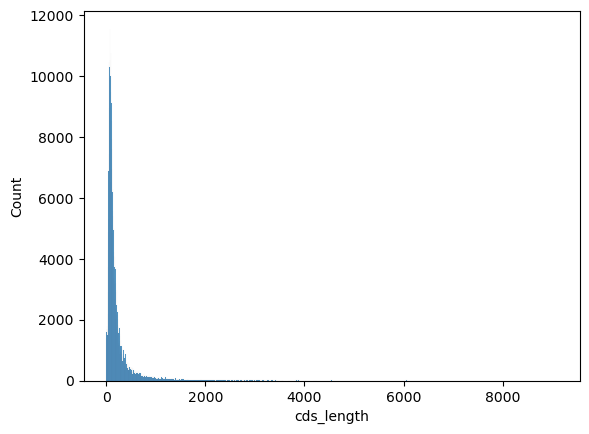

In [35]:
sns.histplot(x='cds_length', data=cds_df)

<Axes: xlabel='cds_length', ylabel='Count'>

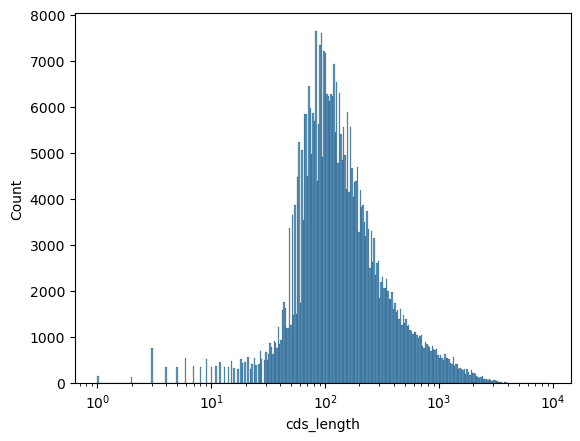

In [36]:
sns.histplot(x='cds_length', data=cds_df, log_scale=True)

<Axes: xlabel='cds_length', ylabel='Count'>

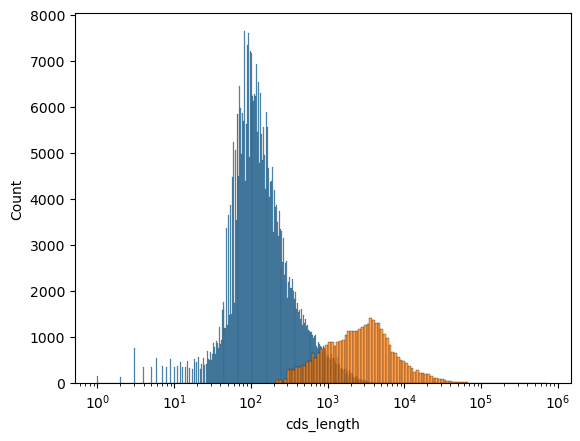

In [37]:
sns.histplot(x='cds_length', data=cds_df, log_scale=True)
sns.histplot(x='gene_length', data=genes_df, log_scale=True)

In [63]:
filt = (df['type'] == 'mRNA') & (df['seqid'].str.contains('chr')) 
trans_df = df.loc[filt]
trans_df

,seqid,source,type,...,strand,phase,attributes
2,chr1,NAM,mRNA,...,+,.,ID=Zm00001eb000010_T001;Parent=Zm00001eb000010;biotype=protein_coding;transcript_id=Zm00001eb000...
24,chr1,NAM,mRNA,...,-,.,ID=Zm00001eb000020_T002;Parent=Zm00001eb000020;biotype=protein_coding;transcript_id=Zm00001eb000...
43,chr1,NAM,mRNA,...,-,.,ID=Zm00001eb000020_T004;Parent=Zm00001eb000020;biotype=protein_coding;transcript_id=Zm00001eb000...
62,chr1,NAM,mRNA,...,-,.,ID=Zm00001eb000020_T003;Parent=Zm00001eb000020;biotype=protein_coding;transcript_id=Zm00001eb000...
85,chr1,NAM,mRNA,...,-,.,ID=Zm00001eb000020_T001;Parent=Zm00001eb000020;biotype=protein_coding;transcript_id=Zm00001eb000...
...,...,...,...,...,...,...,...
1138073,chr10,NAM,mRNA,...,-,.,ID=Zm00001eb434550_T001;Parent=Zm00001eb434550;biotype=protein_coding;transcript_id=Zm00001eb434...
1138079,chr10,NAM,mRNA,...,-,.,ID=Zm00001eb434560_T001;Parent=Zm00001eb434560;biotype=protein_coding;transcript_id=Zm00001eb434...
1138095,chr10,NAM,mRNA,...,+,.,ID=Zm00001eb434570_T001;Parent=Zm00001eb434570;biotype=protein_coding;transcript_id=Zm00001eb434...
1138101,chr10,NAM,mRNA,...,+,.,ID=Zm00001eb434580_T001;Parent=Zm00001eb434580;biotype=protein_coding;transcript_id=Zm00001eb434...


In [64]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max.columns', 6)
pd.set_option('display.max.row', 50)

In [65]:
trans_df[['ID', 'parent', 'biotype', 'trans_ID', 'canonical']] = trans_df['attributes'].str.split(";", expand= True)

/mnt/job-temp/arnstrm/5019717/ipykernel_3525954/855296204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df[['ID', 'parent', 'biotype', 'trans_ID', 'canonical']] = trans_df['attributes'].str.split(";", expand= True)
/mnt/job-temp/arnstrm/5019717/ipykernel_3525954/855296204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df[['ID', 'parent', 'biotype', 'trans_ID', 'canonical']] = trans_df['attributes'].str.split(";", expand= True)
/mnt/job-temp/arnstrm/5019717/ipykernel_3525954/855296204.

In [69]:
trans_df.drop(columns = 'attributes', inplace= True)

,seqid,source,type,...,biotype,trans_ID,canonical
2,chr1,NAM,mRNA,...,biotype=protein_coding,transcript_id=Zm00001eb000010_T001,canonical_transcript=1
24,chr1,NAM,mRNA,...,biotype=protein_coding,transcript_id=Zm00001eb000020_T002,None
43,chr1,NAM,mRNA,...,biotype=protein_coding,transcript_id=Zm00001eb000020_T004,None
62,chr1,NAM,mRNA,...,biotype=protein_coding,transcript_id=Zm00001eb000020_T003,None
85,chr1,NAM,mRNA,...,biotype=protein_coding,transcript_id=Zm00001eb000020_T001,canonical_transcript=1
...,...,...,...,...,...,...,...
1138073,chr10,NAM,mRNA,...,biotype=protein_coding,transcript_id=Zm00001eb434550_T001,canonical_transcript=1
1138079,chr10,NAM,mRNA,...,biotype=protein_coding,transcript_id=Zm00001eb434560_T001,canonical_transcript=1
1138095,chr10,NAM,mRNA,...,biotype=protein_coding,transcript_id=Zm00001eb434570_T001,canonical_transcript=1
1138101,chr10,NAM,mRNA,...,biotype=protein_coding,transcript_id=Zm00001eb434580_T001,canonical_transcript=1


In [83]:
trans_df['biotype'].replace('biotype=', "")

2          protein_coding
24         protein_coding
43         protein_coding
62         protein_coding
85         protein_coding
                ...      
1138073    protein_coding
1138079    protein_coding
1138095    protein_coding
1138101    protein_coding
1138109    protein_coding
Name: biotype, Length: 71791, dtype: object

In [84]:
trans_df.replace('.*=','', regex=True)

,seqid,source,type,...,biotype,trans_ID,canonical
2,chr1,NAM,mRNA,...,protein_coding,Zm00001eb000010_T001,1
24,chr1,NAM,mRNA,...,protein_coding,Zm00001eb000020_T002,None
43,chr1,NAM,mRNA,...,protein_coding,Zm00001eb000020_T004,None
62,chr1,NAM,mRNA,...,protein_coding,Zm00001eb000020_T003,None
85,chr1,NAM,mRNA,...,protein_coding,Zm00001eb000020_T001,1
...,...,...,...,...,...,...,...
1138073,chr10,NAM,mRNA,...,protein_coding,Zm00001eb434550_T001,1
1138079,chr10,NAM,mRNA,...,protein_coding,Zm00001eb434560_T001,1
1138095,chr10,NAM,mRNA,...,protein_coding,Zm00001eb434570_T001,1
1138101,chr10,NAM,mRNA,...,protein_coding,Zm00001eb434580_T001,1


In [85]:
trans_df.replace('.*=','', regex=True, inplace=True)

/mnt/job-temp/arnstrm/5019717/ipykernel_3525954/3094260400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df.replace('.*=','', regex=True, inplace=True)


In [86]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71791 entries, 2 to 1138109
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seqid      71791 non-null  object
 1   source     71791 non-null  object
 2   type       71791 non-null  object
 3   start      71791 non-null  int64 
 4   end        71791 non-null  int64 
 5   score      71791 non-null  object
 6   strand     71791 non-null  object
 7   phase      71791 non-null  object
 8   ID         71791 non-null  object
 9   parent     71791 non-null  object
 10  biotype    71791 non-null  object
 11  trans_ID   71791 non-null  object
 12  canonical  39035 non-null  object
dtypes: int64(2), object(11)
memory usage: 7.7+ MB
